In [ ]:
from pathlib import Path
def get_images(img_path = 'images'):
    img_folder = '..' / Path( img_path)
    if not img_folder.is_dir():
        print("Warning: image folder not found.")
        return []
    return [img_file.as_posix() for img_file in img_folder.iterdir() if img_file.is_file()]




print(get_images())

images = get_images()
img_path = images[0]
img_path

['../images/PXL_20250518_141321723.MP.jpg', '../images/PXL_20250520_162958384.jpg', '../images/PXL_20250522_091625928.jpg', '../images/PXL_20250525_093255637.jpg', '../images/PXL_20250525_122758440.jpg', '../images/PXL_20250525_130926840.jpg', '../images/PXL_20250530_162738003.jpg', '../images/PXL_20250613_084136178.jpg', '../images/PXL_20250616_091823288.jpg', '../images/PXL_20250616_120557808.jpg', '../images/PXL_20250619_084903050.jpg', '../images/PXL_20250623_091719489.MP.jpg', '../images/PXL_20250627_161727029.jpg', '../images/PXL_20250630_140205380.MP.jpg', '../images/PXL_20250630_140218779.jpg', '../images/PXL_20250630_160301403.jpg']


'../images/PXL_20250518_141321723.MP.jpg'

Model page: https://huggingface.co/Qwen/Qwen2.5-VL-3B-Instruct

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/Qwen/Qwen2.5-VL-3B-Instruct)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [3]:
# Use a pipeline as a high-level helper

from transformers import pipeline
#WARNING: Run this only once! (otherwise the GPU will have an OOM error)
pipe = pipeline("image-text-to-text", model="Qwen/Qwen2.5-VL-3B-Instruct")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.
Device set to use cuda:0


In [4]:
#test the pipe
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": img_path,
            },
            {"type": "text", "text": "Describe this image. Keep your response to at most three sentences."},
        ],
    }
]
output = pipe(messages, max_new_tokens = 128)
description = output[-1]['generated_text'][-1]['content']
print(description)

The image showcases a stunning view of Oxford University's historic buildings, featuring intricate Gothic architecture with numerous spires and domes. The sky is clear and blue, providing a beautiful backdrop for the detailed stone structures. In the distance, the surrounding landscape includes trees and other buildings, adding depth to the scene.


In [21]:
images = get_images(img_path=Path('img_dataset')/'images')
captions = []
for image in images:
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": image,
                },
                {"type": "text", "text": "Describe this image. Keep your response to at most three sentences."},
            ],
        }
    ]
    description = pipe(messages, max_new_tokens = 128)[-1]['generated_text'][-1]['content']
    print(description)
    captions.append(description)

The image features a Highland cow standing in a grassy field with a blurred background of rolling hills and trees. The cow has long, shaggy fur and large, curved horns.
The image shows the exterior of a grand, neoclassical building with large columns and intricate architectural details. The building has a prominent entrance with steps leading up to it, where several people are sitting or standing. The sky is clear and blue, suggesting a sunny day.
The image depicts a rocky shoreline during sunset or sunrise, with the sky transitioning from blue to warm hues near the horizon. The rocks are jagged and weathered, with some water pooling in low areas between them. The overall scene is serene and natural, capturing the beauty of coastal landscapes.
The image shows an old stone wall on the left, with a modern building and a construction crane in the background. The sky is clear and blue, indicating a sunny day.
The image shows a street scene with a brick wall on the right side, featuring a s

In [20]:
for desc in captions:
    print(desc)

The image showcases a stunning view of Oxford University's historic buildings, featuring intricate Gothic architecture with numerous spires and domes. The sky is clear and blue, providing a beautiful backdrop for the detailed stone structures. In the distance, the surrounding landscape includes trees and other buildings, adding depth to the scene.
The image depicts a serene garden scene with a brick house in the background. A wooden deck extends over a small pond, featuring a sofa and surrounded by lush greenery. The garden is well-maintained, with various plants and trees, and the sky is clear with some clouds.
The image shows the exterior of a building with multiple storefronts, including a pharmacy and a café. The building has a sign that reads "Crescent House" and another sign indicating it is part of the Corporation of London's Housing Golden Lane Estate. There is also a "Controlled Zone" sign in front of the building. The street name is Goswell Road EC1.
The image shows a large, 

In [25]:
import pandas as pd
img_data = [{'file_name': image, 'description' : caption} for image, caption in zip(images, captions)]
df = pd.DataFrame(img_data)
df.to_csv(".\img_dataset\metadata.csv", index=False)


In [43]:
#Resize and save all images
from pathlib import Path
from PIL import Image
from tqdm import tqdm
# --- Configuration ---
# You can change these settings
INPUT_DIR = Path('..')/ 'img_dataset'/ 'unprocessed_images'  #Folder with unprocessed images
OUTPUT_DIR = Path('.') / 'img_dataset' / 'images' # Folder where standardized images will be saved
MAX_DIMENSION = 1024        # Max width or height of the image
QUALITY = 85                # JPEG quality (1-100)
OUTPUT_FORMAT = "JPEG"      # "JPEG" or "WEBP"

def standardize_images():
    """
    Processes images in the input directory and saves standardized
    versions in the output directory.
    """
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    image_files = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))]
    
    print(f"Found {len(image_files)} images to process.")

    for filename in tqdm(image_files, desc="Standardizing Images"):
        try:
            input_path = os.path.join(INPUT_DIR, filename)
            image = Image.open(input_path)

            # Convert to RGB to handle transparency (e.g., in PNGs) and ensure compatibility
            if image.mode != 'RGB':
                image = image.convert('RGB')
            
            # --- Resize while preserving aspect ratio ---
            if image.width > MAX_DIMENSION or image.height > MAX_DIMENSION:
                image.thumbnail((MAX_DIMENSION, MAX_DIMENSION), Image.Resampling.LANCZOS)

            # --- Save the standardized image ---
            base, _ = os.path.splitext(filename)
            new_filename = f"{base}.{OUTPUT_FORMAT.lower()}"
            output_path = os.path.join(OUTPUT_DIR, new_filename)
            
            image.save(output_path, OUTPUT_FORMAT, quality=QUALITY)

        except Exception as e:
            print(f"\nCould not process {filename}. Error: {e}")

    print(f"\nProcessing complete. Standardized images are in the '{OUTPUT_DIR}' folder.")


In [44]:
standardize_images()

Found 67 images to process.


Standardizing Images: 100%|██████████| 67/67 [00:13<00:00,  5.10it/s]


Processing complete. Standardized images are in the 'img_dataset/images' folder.


In [72]:
from PIL import Image
path = (df['file_name'][1])
print(path)
im = Image.open(path)

img_dataset/images/PXL_20240808_144210762.jpeg


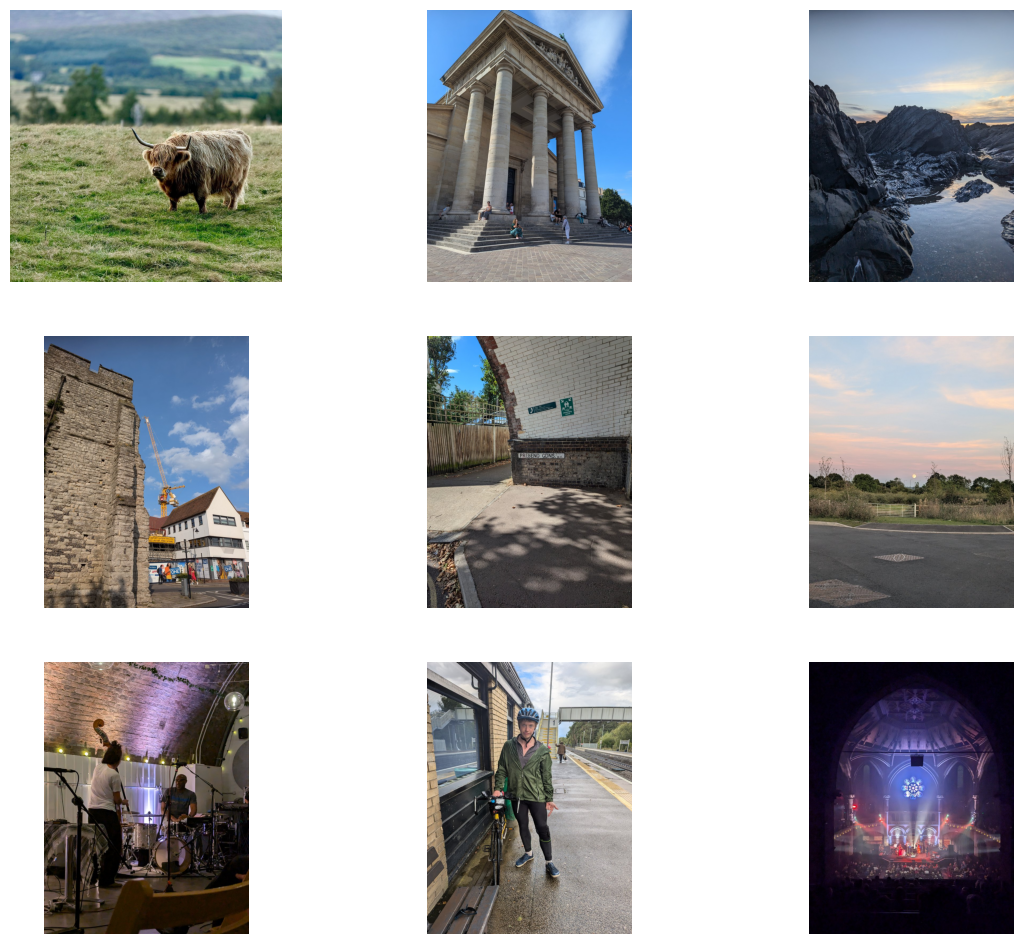

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,3)
ax = ax.flatten()
for axis in ax:
    axis.set_axis_off()
for i in range(9):
    ax[i].imshow(Image.open(df['file_name'][i]))

fig.set_figheight(12)
fig.set_figwidth(14)

In [81]:
#go through and rename images to img_001 etc.
INPUT_DIR = Path("img_dataset") / 'images'
new_paths = []

for index, row in df.iterrows():

    original_path = Path(row['file_name'])

    #new filename
    new_name = f"image_{index + 1:03d}.jpg"
    new_path = original_path.parent / new_name

    original_path.rename(new_path)
    new_paths.append(str(new_path))

df['file_name'] = new_paths

df.head()


,file_name,description
0,img_dataset/images/image_001.jpg,The image features a Highland cow standing in ...
1,img_dataset/images/image_002.jpg,"The image shows the exterior of a grand, neocl..."
2,img_dataset/images/image_003.jpg,The image depicts a rocky shoreline during sun...
3,img_dataset/images/image_004.jpg,"The image shows an old stone wall on the left,..."
4,img_dataset/images/image_005.jpg,The image shows a street scene with a brick wa...


In [84]:
df['file_name'] = df['file_name'].apply(
    lambda p : str(Path(*Path(p).parts[1:]))
)

df.head()

,file_name,description
0,images/image_001.jpg,The image features a Highland cow standing in ...
1,images/image_002.jpg,"The image shows the exterior of a grand, neocl..."
2,images/image_003.jpg,The image depicts a rocky shoreline during sun...
3,images/image_004.jpg,"The image shows an old stone wall on the left,..."
4,images/image_005.jpg,The image shows a street scene with a brick wa...


In [69]:
jpg_to_jpeg = lambda p: str(Path(p).with_suffix('.jpeg')) if Path(p).suffix.lower() == '.jpg' else p


df['file_name'] = df['file_name'].apply(
    jpg_to_jpeg
)
df.head()

,file_name,description
0,img_dataset/images/IMG-20240830-WA0035.jpeg,The image features a Highland cow standing in ...
1,img_dataset/images/PXL_20240808_144210762.jpeg,"The image shows the exterior of a grand, neocl..."
2,img_dataset/images/PXL_20240814_193607785.jpeg,The image depicts a rocky shoreline during sun...
3,img_dataset/images/PXL_20240817_153710097.MP.jpeg,"The image shows an old stone wall on the left,..."
4,img_dataset/images/PXL_20240903_115821903.jpeg,The image shows a street scene with a brick wa...


In [110]:
print(df.head())
df.to_csv('img_dataset/metadata.csv', index = False)


              file_name                                        description
0  images/image_001.jpg  The image features a Highland cow standing in ...
1  images/image_002.jpg  The image shows the exterior of a grand, neocl...
2  images/image_003.jpg  The image depicts a rocky shoreline during sun...
3  images/image_004.jpg  The image shows an old stone wall on the left,...
4  images/image_005.jpg  The image shows a street scene with a brick wa...


In [113]:
#Set up huggingface
import datasets

img_dataset = datasets.load_dataset(
    "csv",
    data_files="metadata.csv"
)

Generating train split: 0 examples [00:00, ? examples/s]

In [114]:
#upload to huggingface:
features = datasets.Features({
    "image": datasets.Image(),
    "description": datasets.Value("string")
})

In [115]:
img_dataset = img_dataset.rename_column("file_name", "image")
img_dataset = img_dataset.cast(features)
img_dataset

Casting the dataset:   0%|          | 0/67 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'description'],
        num_rows: 67
    })
})

In [116]:
str(Path("img_dataset").absolute())

'/root/MLX_W4_DD_Transfer_Learning/qwen_large/img_dataset/img_dataset'

In [118]:
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir('.'))
if os.path.exists('images'):
    print("Files in images directory:", os.listdir('images'))
else:
    print("Images directory does not exist")

# Check a few rows of your dataset
print("First few rows of dataset:")
print(img_dataset['train'][:3])
repo_id = "ntkuhn/mlx_dropouts_images"
img_dataset.push_to_hub(repo_id)


Current working directory: /root/MLX_W4_DD_Transfer_Learning/qwen_large/img_dataset
Files in current directory: ['images', 'metadata.csv']
Files in images directory: ['image_009.jpg', 'image_010.jpg', 'image_011.jpg', 'image_012.jpg', 'image_013.jpg', 'image_014.jpg', 'image_015.jpg', 'image_016.jpg', 'image_017.jpg', 'image_018.jpg', 'image_019.jpg', 'image_020.jpg', 'image_021.jpg', 'image_022.jpg', 'image_023.jpg', 'image_024.jpg', 'image_025.jpg', 'image_026.jpg', 'image_027.jpg', 'image_028.jpg', 'image_029.jpg', 'image_030.jpg', 'image_031.jpg', 'image_032.jpg', 'image_033.jpg', 'image_034.jpg', 'image_035.jpg', 'image_036.jpg', 'image_037.jpg', 'image_038.jpg', 'image_039.jpg', 'image_040.jpg', 'image_041.jpg', 'image_042.jpg', 'image_043.jpg', 'image_044.jpg', 'image_045.jpg', 'image_046.jpg', 'image_047.jpg', 'image_048.jpg', 'image_049.jpg', 'image_050.jpg', 'image_051.jpg', 'image_052.jpg', 'image_053.jpg', 'image_054.jpg', 'image_055.jpg', 'image_056.jpg', 'image_057.jpg', 

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ntkuhn/mlx_dropouts_images/commit/bbf09619ed69c0135bc81035e9563dbf748e90f7', commit_message='Upload dataset', commit_description='', oid='bbf09619ed69c0135bc81035e9563dbf748e90f7', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/ntkuhn/mlx_dropouts_images', endpoint='https://huggingface.co', repo_type='dataset', repo_id='ntkuhn/mlx_dropouts_images'), pr_revision=None, pr_num=None)

In [119]:
#upload to huggingface:
features = datasets.Features({
    "image": datasets.Image(),
    "description": datasets.Value("string")
})

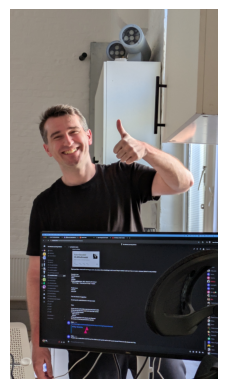

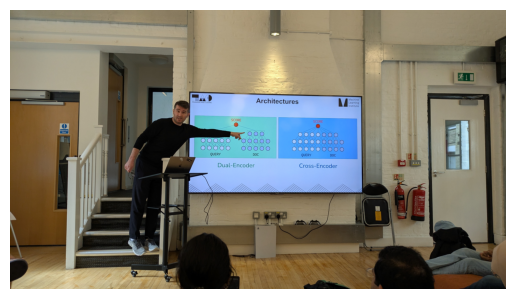

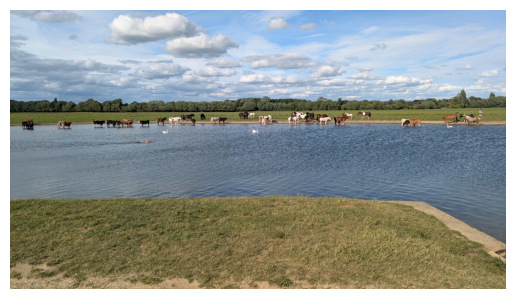

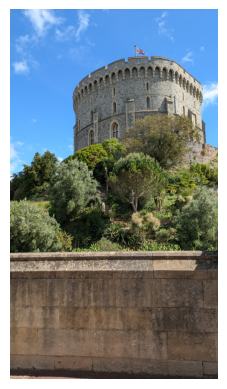

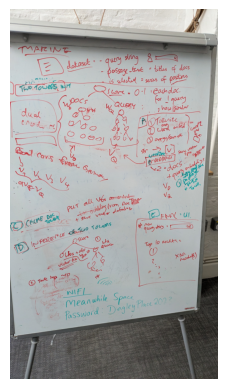

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#display some images
def display_images(num = 5):
    images = get_images()
    if num > len(images):
        raise ValueError("Not enough images to display")
    images = np.random.choice(images, size = num, replace=False)
    for i, im_path in enumerate(images):
        with Image.open(im_path) as image:
            plt.imshow(image)
            plt.axis('off')
            plt.show()

display_images()

In [ ]:
# Load model directly
from transformers import AutoProcessor, AutoModelForImageTextToText

#processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct")
#model = AutoModelForImageTextToText.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct")

In [ ]:
message = [{'role': 'user',
    'content': [{'type': 'image', 'image': './IMG_4864.jpg'},
     {'type': 'text', 'text': 'Describe this image.'}]},
   {'role': 'assistant',
    'content': 'The image depicts two individuals in an indoor setting, likely an office or classroom environment. The background features'}]

img_path
# Corrected message format
corrected_message = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": "./IMG_4864.jpg"},
            {"type": "text", "text": "Describe this image."},
        ],
    }
]

# The pipe function in this case expects the input in a list of dictionaries, where each dictionary represent a turn
# in the conversation. For example:
# pipe(text=[{"role": "user", "content": "Describe this image."}])
# pipe(text=[{"role": "user", "content": "Describe this image."}, {"role": "assistant", "content": "The image depicts..."}])
# In this case, the error comes because the list of dictionaries contains the whole conversation, so we have to pass
# it to the pipe function as a list with one element, which is the list of dictionaries itself.

pipe(text=[message], max_new_tokens=500)

TypeError: string indices must be integers, not 'str'